Let's define the libraries

In [216]:
#Data frame
import pandas as pd
#Matrix math
import numpy as np
#Prediction
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#Eliminate warnings
import warnings
warnings.filterwarnings('ignore')

In [217]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [218]:
len(train)

891

In [219]:
train.describe(include= "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Sagesser, Mlle. Emma",male,NaN,NaN,NaN,1601,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [220]:
print(train.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [221]:
train.sample(5) #train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
322,323,1,2,"Slayter, Miss. Hilda Mary",female,30.0,0,0,234818,12.3500,NaN,Q
808,809,0,2,"Meyer, Mr. August",male,39.0,0,0,248723,13.0000,NaN,S
800,801,0,2,"Ponesell, Mr. Martin",male,34.0,0,0,250647,13.0000,NaN,S
596,597,1,2,"Leitch, Miss. Jessie Wills",female,NaN,0,0,248727,33.0000,NaN,S
547,548,1,2,"Padro y Manent, Mr. Julian",male,NaN,0,0,SC/PARIS 2146,13.8625,NaN,C


Percentage of males that survived: 18.890814558058924
Percentage of females that survived: 74.20382165605095


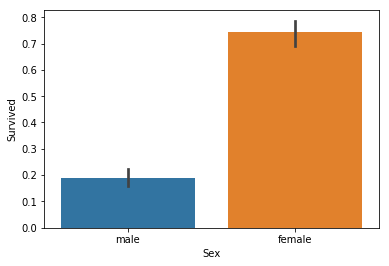

In [222]:
sns.barplot(x = "Sex", y = "Survived", data = train)
females = train["Survived"][train.Sex == 'female'].value_counts(normalize = True)[1]*100
males = train["Survived"][train.Sex == "male"].value_counts(normalize = True)[1]*100
print("Percentage of males that survived:",males)
print("Percentage of females that survived:", females)

## sns.barplot(x = "Pclass", y = "Survived", data = train)
p1 = train["Survived"][train.Pclass == 1].value_counts(normalize = True)[1]*100
p2 = train["Survived"][train.Pclass == 2].value_counts(normalize = True)[1]*100
p3 = train["Survived"][train.Pclass == 3].value_counts(normalize = True)[1]*100
print("Percentage that survived in Class 1:", p1)
print("Percentage that survived in Class 2:", p2)
print("Percentage that survived in Class 3:", p3)

Percentage of 0 sibilings that survived: 34.53947368421053
Percentage of 1 sibilings that survived: 53.588516746411486
Percentage of 2 sibilings that survived: 46.42857142857143
Percentage of 3 sibilings that survived: 25.0


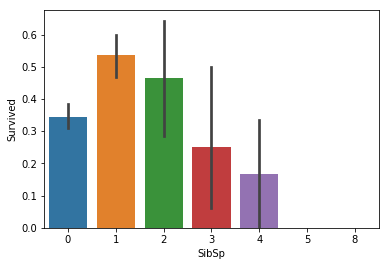

In [223]:
sns.barplot(x = "SibSp", y = "Survived", data = train)
ss1 = train["Survived"][train.SibSp == 0].value_counts(normalize = True)[1]*100
ss2 = train["Survived"][train.SibSp == 1].value_counts(normalize = True)[1]*100
ss3 = train["Survived"][train.SibSp == 2].value_counts(normalize = True)[1]*100
ss4 = train["Survived"][train.SibSp == 3].value_counts(normalize = True)[1]*100
print("Percentage of 0 sibilings that survived:", ss1)
print("Percentage of 1 sibilings that survived:", ss2)
print("Percentage of 2 sibilings that survived:", ss3)
print("Percentage of 3 sibilings that survived:", ss4)

Percentage of 0 sibilings that survived: 34.365781710914455
Percentage of 1 sibilings that survived: 55.08474576271186
Percentage of 2 sibilings that survived: 50.0
Percentage of 3 sibilings that survived: 60.0
Percentage of 3 sibilings that survived: 20.0


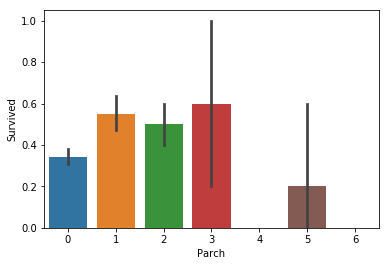

In [224]:
sns.barplot(x = "Parch", y = "Survived", data = train)
pc1 = train["Survived"][train.Parch == 0].value_counts(normalize = True)[1]*100
pc2 = train["Survived"][train.Parch == 1].value_counts(normalize = True)[1]*100
pc3 = train["Survived"][train.Parch == 2].value_counts(normalize = True)[1]*100
pc4 = train["Survived"][train.Parch == 3].value_counts(normalize = True)[1]*100
pc5 = train["Survived"][train.Parch == 5].value_counts(normalize = True)[1]*100
print("Percentage of 0 sibilings that survived:", pc1)
print("Percentage of 1 sibilings that survived:", pc2)
print("Percentage of 2 sibilings that survived:", pc3)
print("Percentage of 3 sibilings that survived:", pc4)
print("Percentage of 3 sibilings that survived:", pc5)

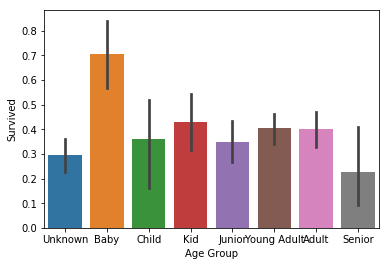

In [225]:
train["Age"] = train["Age"].fillna(-0.5)
test["Age"] = test["Age"].fillna(-0.5)

bins = [-1, 0, 5, 12 , 18, 24 , 35, 60, np.inf]
group = ["Unknown", "Baby", "Child", "Kid", "Junior", "Young Adult", "Adult", "Senior"]
train["Age Group"] = pd.cut(train["Age"], bins, labels = group)
test["Age Group"] = pd.cut(test["Age"], bins, labels = group)

sns.barplot(x = "Age Group", y = "Survived", data = train)

Percentage of people in cabinebool 0 that survived 29.985443959243085
Percentage of people in cabinebool 1 that survived 66.66666666666666


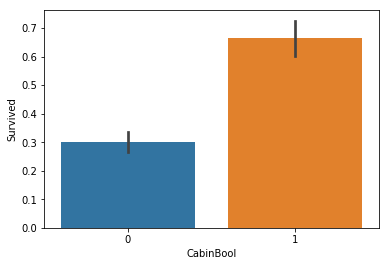

In [226]:
train["CabinBool"] = (train["Cabin"].notnull().astype("int"))
test["CabinBool"] = test["Cabin"].notnull().astype("int")

print("Percentage of people in cabinebool 0 that survived", train["Survived"][train.CabinBool == 0].
      value_counts(normalize = True)[1]*100)
print("Percentage of people in cabinebool 1 that survived", train["Survived"][train.CabinBool == 1].
      value_counts(normalize = True)[1]*100)
sns.barplot(x = "CabinBool", y = "Survived", data = train)
plt.show()

In [227]:
test.describe(include = "all")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age Group,CabinBool
count,418.000000,418.000000,418,418,418.000000,418.000000,418.000000,418,417.000000,91,418,418,418.000000
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3,8,NaN
top,NaN,NaN,"Kink-Heilmann, Mrs. Anton (Luise Heilmann)",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S,Young Adult,NaN
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270,96,NaN
mean,1100.500000,2.265550,NaN,NaN,23.941388,0.447368,0.392344,NaN,35.627188,NaN,NaN,NaN,0.217703
std,120.810458,0.841838,NaN,NaN,17.741080,0.896760,0.981429,NaN,55.907576,NaN,NaN,NaN,0.413179
min,892.000000,1.000000,NaN,NaN,-0.500000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000000
25%,996.250000,1.000000,NaN,NaN,9.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN,0.000000
50%,1100.500000,3.000000,NaN,NaN,24.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,0.000000
75%,1204.750000,3.000000,NaN,NaN,35.750000,1.000000,0.000000,NaN,31.500000,NaN,NaN,NaN,0.000000


In [228]:
train = train.drop(['Cabin'], axis = 1)

In [229]:
test = test.drop(['Cabin'], axis = 1)

In [230]:
train = train.drop(['Ticket'], axis = 1)
test = test.drop(['Ticket'], axis = 1)

In [231]:
a = train["Embarked"] == "S"
print("People that embarked in S:",a.astype("int").value_counts()[1])

a = train["Embarked"] == "C"
print("People that embarked in C:",a.astype("int").value_counts()[1])

a = train["Embarked"] == "Q"
print("People that embarked in Q:",a.astype("int").value_counts()[1])

People that embarked in S: 644
People that embarked in C: 168
People that embarked in Q: 77


In [232]:
train = train.fillna({"Embarked" : "S"})


In [233]:
combine = [train, test]
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [234]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col',
    'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


In [235]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Age Group,CabinBool,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Junior,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Adult,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Young Adult,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Young Adult,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Young Adult,0,1


In [236]:
# fill missing age with mode age group for each title
mr_age = train[train["Title"] == 1]["Age Group"].mode() #Young Adult
miss_age = train[train["Title"] == 2]["Age Group"].mode() #Student
mrs_age = train[train["Title"] == 3]["Age Group"].mode() #Adult
master_age = train[train["Title"] == 4]["Age Group"].mode() #Baby
royal_age = train[train["Title"] == 5]["Age Group"].mode() #Adult
rare_age = train[train["Title"] == 6]["Age Group"].mode() #Adult

age_title_mapping = {1: "Young Adult", 2: "Student", 3: "Adult", 4: "Baby", 5: "Adult", 6: "Adult"}

#I tried to get this code to work with using .map(), but couldn't.
#I've put down a less elegant, temporary solution for now.
train = train.fillna({"Age": train["Title"].map(age_title_mapping)})
test = test.fillna({"Age": test["Title"].map(age_title_mapping)})


In [237]:
#map each Age value to a numerical value
age_mapping = {'Baby': 1, 'Child': 2, 'Kid': 3, 'Junior': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7}

train['Age Group'] = train['Age Group'].map(age_mapping)
test['Age Group'] = test['Age Group'].map(age_mapping)


In [238]:
#dropping the Age feature for now, might change
train = train.drop(['Age'], axis = 1)
test = test.drop(['Age'], axis = 1)

In [239]:
train["Age Group"] = train["Age Group"].fillna(0)
train.head(6)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Fare,Embarked,Age Group,CabinBool,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,7.2500,S,4.0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,71.2833,C,6.0,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,7.9250,S,5.0,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,53.1000,S,5.0,1,3
4,5,0,3,"Allen, Mr. William Henry",male,0,0,8.0500,S,5.0,0,1
5,6,0,3,"Moran, Mr. James",male,0,0,8.4583,Q,0.0,0,1


In [240]:
#drop the name feature since it contains no more useful information.
train = train.drop(['Name'], axis = 1)
test = test.drop(['Name'], axis = 1)

In [241]:
sex_mapping = {"male" : 0 , "female" : 1}
train["Sex"] = train["Sex"].map(sex_mapping)
test["Sex"] = test["Sex"].map(sex_mapping)

train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age Group,CabinBool,Title
0,1,0,3,0,1,0,7.2500,S,4.0,0,1
1,2,1,1,1,1,0,71.2833,C,6.0,1,3
2,3,1,3,1,0,0,7.9250,S,5.0,0,2
3,4,1,1,1,1,0,53.1000,S,5.0,1,3
4,5,0,3,0,0,0,8.0500,S,5.0,0,1


In [242]:
embarked_mapping = {"S" : 1, "C" : 2, "Q" : 3}
train["Embarked"] = train["Embarked"].map(embarked_mapping)
test["Embarked"] = test["Embarked"].map(embarked_mapping)


In [243]:
#fill in missing Fare value in test set based on mean fare for that Pclass 
for x in range(len(test["Fare"])):
    if pd.isnull(test["Fare"][x]):
        pclass = test["Pclass"][x] #Pclass = 3
        test["Fare"][x] = round(train[train["Pclass"] == pclass]["Fare"].mean(), 4)
        
#map Fare values into groups of numerical values
train['FareBand'] = pd.qcut(train['Fare'], 4, labels = [1, 2, 3, 4])
test['FareBand'] = pd.qcut(test['Fare'], 4, labels = [1, 2, 3, 4])


In [244]:
#drop Fare values
train = train.drop(['Fare'], axis = 1)
test = test.drop(['Fare'], axis = 1)

In [245]:
from sklearn.model_selection import train_test_split
predictors = train.drop(["Survived", "PassengerId"], axis = 1)

In [246]:
target = train["Survived"]

In [247]:
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.22, random_state = 0)

In [248]:
target = target.fillna(0)

In [254]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

clf = GaussianNB()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_val)
acc_gaussian = round(accuracy_score(y_pred, y_val)*100, 2)
print(acc_gaussian)

78.68


In [257]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val)*100, 2)
print(acc_logreg)

79.7


In [258]:
from sklearn import svm

supvec = svm.SVC()
supvec.fit(x_train, y_train)
y_pred = supvec.predict(x_val)
acc_supvec = round(accuracy_score(y_pred, y_val)*100, 2)
print(acc_supvec)

83.25


In [261]:
from sklearn.svm import LinearSVC

lsv = LinearSVC()
lsv.fit(x_train, y_train)
y_pred = lsv.predict(x_val)
acc_lsv = round(accuracy_score(y_pred, y_val)*100, 2)
print(acc_lsv)

78.17


In [263]:
from sklearn.linear_model import Perceptron

pt = Perceptron()
pt.fit(x_train, y_train)
y_pred = pt.predict(x_val)
acc_pt = round(accuracy_score(y_pred, y_val)*100, 2)
print(acc_pt)

80.71


In [270]:
from sklearn import tree

tree = tree.DecisionTreeClassifier()
tree.fit(x_train, y_train)
y_pred = tree.predict(x_val)
acc_tree = round(accuracy_score(y_pred, y_val)*100, 2)
print(acc_tree)

79.7


In [269]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
y_pred = RFC.predict(x_val)
acc_RFC = round(accuracy_score(y_pred, y_val)*100, 2)
print(acc_RFC)

85.28


In [268]:
from sklearn.neighbors import KNeighborsClassifier

KN = KNeighborsClassifier()
KN.fit(x_train, y_train)
y_pred = KN.predict(x_val)
acc_KN = round(accuracy_score(y_pred, y_val)*100, 2)
print(acc_KN)

83.76


In [271]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)
y_pred = gbc.predict(x_val)
acc_gbc = round(accuracy_score(y_pred, y_val)*100, 2)
print(acc_gbc)

83.76


In [272]:
from sklearn.linear_model import SGDClassifier

SGDC = SGDClassifier()
SGDC.fit(x_train, y_train)
y_pred = SGDC.predict(x_val)
acc_SGDC = round(accuracy_score(y_pred, y_val)*100, 2)
print(acc_SGDC)

77.16


In [273]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 'Linear SVC', 
              'Decision Tree', 'Stochastic Gradient Descent', 'Gradient Boosting Classifier'],
    'Score': [acc_supvec, acc_KN, acc_logreg, 
              acc_RFC, acc_gaussian, acc_pt, acc_lsv, acc_tree,
              acc_SGDC, acc_gbc]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,85.28
1,KNN,83.76
9,Gradient Boosting Classifier,83.76
0,Support Vector Machines,83.25
5,Perceptron,80.71
2,Logistic Regression,79.70
7,Decision Tree,79.70
4,Naive Bayes,78.68
6,Linear SVC,78.17
8,Stochastic Gradient Descent,77.16
